In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()

In [16]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [28]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [29]:
df.to_csv('iris.csv',encoding='utf-8')

In [31]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


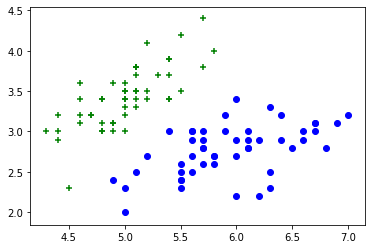

In [33]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue',marker='o')

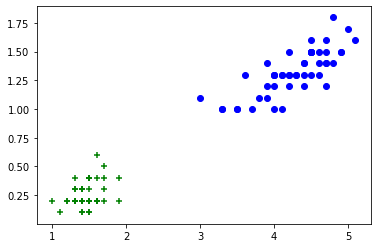

In [34]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue',marker='o')

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(['target','flower_name'],axis='columns')
y = df.target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
len(X_train)

120

In [40]:
len(X_test)

30

In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC()

In [43]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
model.score(X_test,y_test)

0.9666666666666667

In [46]:
pred = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred))

[[ 6  0  0]
 [ 0 11  1]
 [ 0  0 12]]
